In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
#identify the null values column wise
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#check fot unique values in each column
for col_name in df.columns: 
    print(col_name,df[col_name].unique())

id [1077501 1077430 1077175 ...   90395   90376   87023]
member_id [1296599 1314167 1313524 ...   90390   89243   86999]
loan_amnt [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050

# Data Cleaning

In [7]:
#Drop columns that specify customer specific details and demographic details
df.drop(["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc",
         "pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv",
         "total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",
         "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d",
         "application_type","emp_title","issue_d","url","zip_code","id","member_id"],axis =1,inplace = True)  

In [8]:
#Remove missing columns
df.dropna(axis=1, how='all',inplace = True)

In [9]:
df.columns
df.shape

(39717, 30)

In [10]:
#title & purpose are having same value, dropping title
df["purpose"].value_counts()
df["title"].value_counts()
df.drop(["title"], axis = 1, inplace = True)

In [11]:
#not giving much value to analysis
df.drop(["desc"], axis = 1, inplace = True)

In [12]:
#remove columns having more than 40 - 60% null values
df.drop(["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"], axis = 1, inplace = True)

In [13]:
df["installment"].value_counts()

311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: installment, Length: 15383, dtype: int64

In [14]:
#remove columns having zero values
df.drop(["collections_12_mths_ex_med","acc_now_delinq","chargeoff_within_12_mths",
         "delinq_amnt","tax_liens","pymnt_plan","initial_list_status","policy_code","pub_rec_bankruptcies"], axis = 1, inplace = True)

In [15]:
df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

In [16]:
df.describe()  # Dataset has meaningful data 

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

# Imputing null values

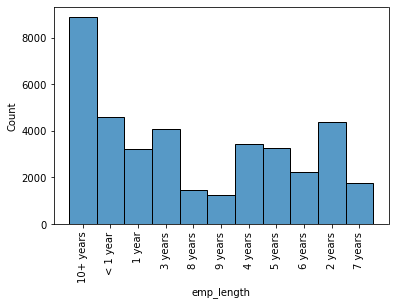

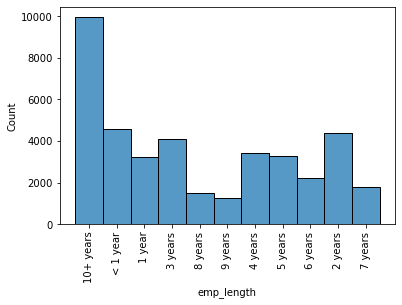

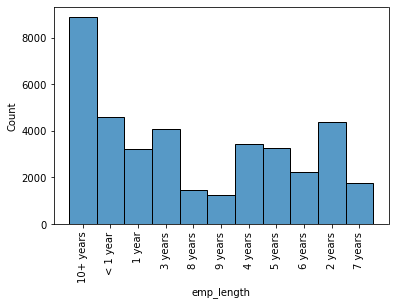

In [18]:
sns.histplot(df["emp_length"])
plt.xticks(rotation=90)
plt.show()
#Employee length is imputed with the mode retaining the distribution 
emp_length = df["emp_length"].fillna(df["emp_length"].mode().iloc[0])
sns.histplot(emp_length)
plt.xticks(rotation=90)
plt.show()

#Imputing skewed the dataset, hence removing them to maintain a meaningful dataset
df_cleaned = df.dropna(subset=["emp_length"])
sns.histplot(df_cleaned["emp_length"])
plt.xticks(rotation=90)
plt.show()

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38642 non-null  int64  
 1   funded_amnt          38642 non-null  int64  
 2   funded_amnt_inv      38642 non-null  float64
 3   term                 38642 non-null  object 
 4   int_rate             38642 non-null  object 
 5   installment          38642 non-null  float64
 6   grade                38642 non-null  object 
 7   sub_grade            38642 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       38642 non-null  object 
 10  annual_inc           38642 non-null  float64
 11  verification_status  38642 non-null  object 
 12  loan_status          38642 non-null  object 
 13  purpose              38642 non-null  object 
 14  addr_state           38642 non-null  object 
 15  dti                  38642 non-null 

# Identify Variable of purpose

In [20]:
df_cleaned["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Consider only charged and fully paid customers for analysis

In [21]:
#distribution of status value
df_cleaned["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

loan amount, funded amount, funding amount investment -
1 - Amount requested by the borrower
2 - Amount approved by the agency
3 - Amount funded by investors

location - higher cost of living higher risk

stacked bar chart - multivariae analysis
write the recommendation must
grade & subgrade - risk analytics - google and find

In [22]:
#Current user data not helping in identifying risk factors, hence dropping them
df_cleaned.drop(df_cleaned.index[df_cleaned["loan_status"] == "Current"], inplace = True)

In [23]:
df_cleaned["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [24]:
df_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti'],
      dtype='object')

# Treating outliers

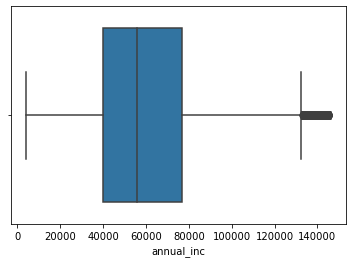

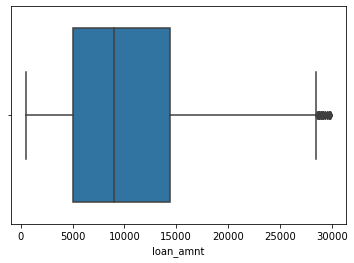

In [25]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

df_outlier_rem = remove_outlier_IQR(df_cleaned["annual_inc"])
df_outlier_removed=pd.DataFrame(df_outlier_rem)
ind_diff=df_cleaned.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df_cleaned.drop([ind_diff[i]])
    df_cleaned=df_final

df_outlier_rem = remove_outlier_IQR(df_cleaned["loan_amnt"])
df_outlier_removed=pd.DataFrame(df_outlier_rem)
ind_diff=df_cleaned.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df_cleaned.drop([ind_diff[i]])
    df_cleaned=df_final

sns.boxplot(x=df_cleaned["annual_inc"])
plt.show()

sns.boxplot(x=df_cleaned["loan_amnt"])
plt.show()

# EDA

In [26]:
#Identify categorical & continuous columns
cat_cols = ["term","grade","sub_grade","emp_length","home_ownership","verification_status","loan_status",
           "purpose","addr_state","pub_rec_bankruptcies"]
cont_cols = ["id", "member_id", "loan_amnt", "funded_amnt", "funded_amnt_inv",
            "int_rate","installment", "annual_inc","dti"]

In [27]:
df_cleaned["dti"].value_counts()

0.00     160
18.00     42
19.20     39
12.00     39
13.20     37
        ... 
27.77      1
27.63      1
26.33      1
28.88      1
25.43      1
Name: dti, Length: 2839, dtype: int64

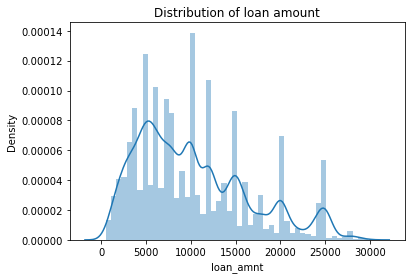

In [28]:
#identify distribution of loan amount
sns.distplot(df_cleaned["loan_amnt"])
plt.title("Distribution of loan amount")
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

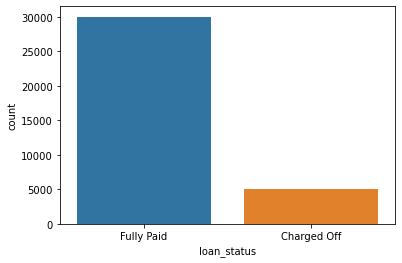

In [29]:
sns.countplot(df_cleaned["loan_status"])
#only 20% of the people are charged off

0.05     2400.0
0.25     5000.0
0.50     9000.0
0.75    14400.0
1.00    29850.0
Name: loan_amnt, dtype: float64


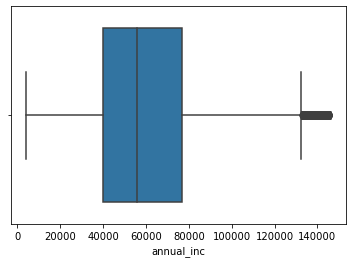

In [30]:
sns.boxplot(x=df_cleaned["annual_inc"])
#annual income has outliers to be treated

print(df_cleaned["loan_amnt"].quantile([0.05,0.25,0.5,0.75,1]))

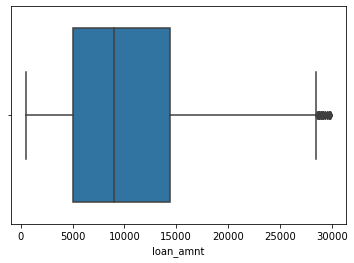

0.05     2400.0
0.25     5000.0
0.50     9000.0
0.75    14400.0
1.00    29850.0
Name: loan_amnt, dtype: float64


In [31]:
sns.boxplot(x=df_cleaned["loan_amnt"])
plt.show()

print(df_cleaned["loan_amnt"].quantile([0.05,0.25,0.5,0.75,1]))

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

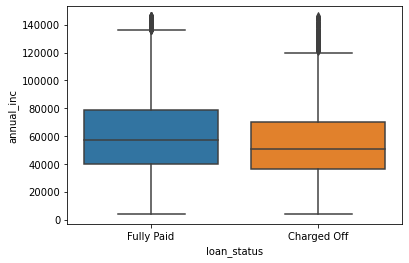

In [32]:
sns.boxplot(x=df_cleaned["loan_status"], y=df_cleaned["annual_inc"])
#Borrowers with very less annual income tend to default the loan

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

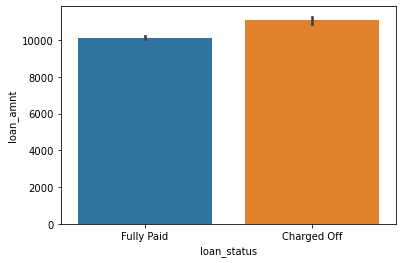

In [33]:
sns.barplot(x=df_cleaned["loan_status"], y=df_cleaned["loan_amnt"])
#Recommendation: Higher values of loan amount requested are likely to be charged off

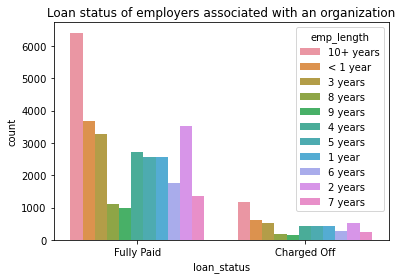

In [34]:
sns.countplot(x=df_cleaned["loan_status"], hue=df_cleaned["emp_length"])
plt.title("Loan status of employers associated with an organization")
plt.show()
#Employees associated with an employer for very less time charged off more likely
#Employees associated with 10+ years are more likely to pay off the loan

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

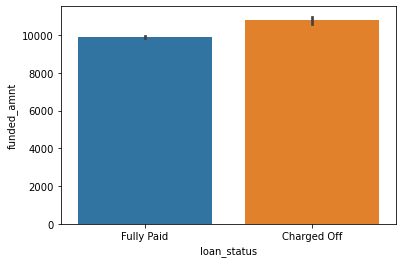

In [35]:
sns.barplot(x=df_cleaned["loan_status"], y=df_cleaned["funded_amnt"])
#Higher the funded amount, more likely to be charged off

<AxesSubplot:xlabel='emp_length,loan_status'>

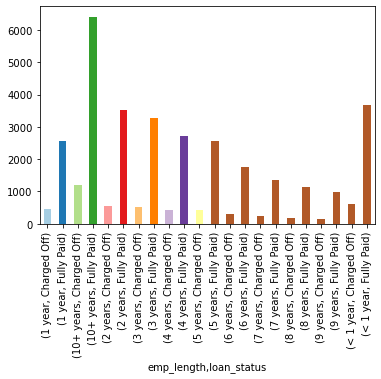

In [36]:
#Funding processed to people with more than 10+ years are paying the loan fully
df_cleaned.groupby(["emp_length","loan_status"])["funded_amnt"].count().plot.bar(color=plt.cm.Paired(np.arange(len(df)))) 

<AxesSubplot:xlabel='loan_amnt', ylabel='funded_amnt'>

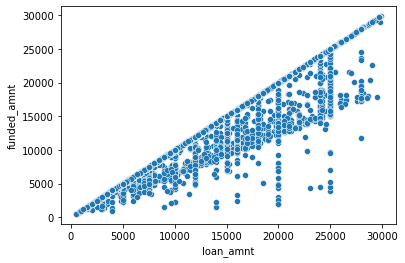

In [37]:
sns.scatterplot(x=df_cleaned["loan_amnt"], y=df_cleaned["funded_amnt"]) #Distribution of loan amnt vs funded amnt

<AxesSubplot:xlabel='loan_status', ylabel='count'>

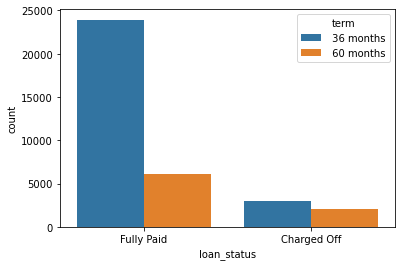

In [38]:
sns.countplot(x=df_cleaned["loan_status"], hue=df_cleaned["term"])

<AxesSubplot:xlabel='loan_status,term,grade'>

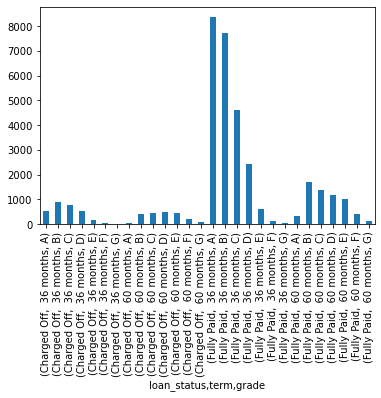

In [39]:
df_cleaned.groupby(["loan_status","term","grade"])["loan_amnt"].count().plot.bar()

In [40]:
df_cleaned.groupby(["loan_status","term","grade"])["loan_amnt"].count().reset_index()

,loan_status,term,grade,loan_amnt
0,Charged Off,36 months,A,513
1,Charged Off,36 months,B,895
2,Charged Off,36 months,C,788
3,Charged Off,36 months,D,539
4,Charged Off,36 months,E,151
5,Charged Off,36 months,F,44
6,Charged Off,36 months,G,18
7,Charged Off,60 months,A,35
8,Charged Off,60 months,B,390
9,Charged Off,60 months,C,445


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

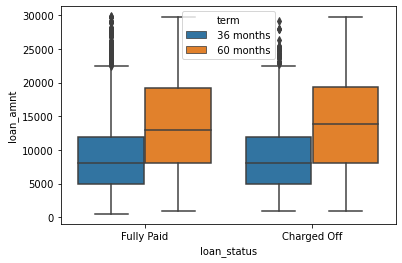

In [41]:
sns.boxplot(x=df_cleaned["loan_status"], y=df_cleaned["loan_amnt"],
            hue=df_cleaned["term"])

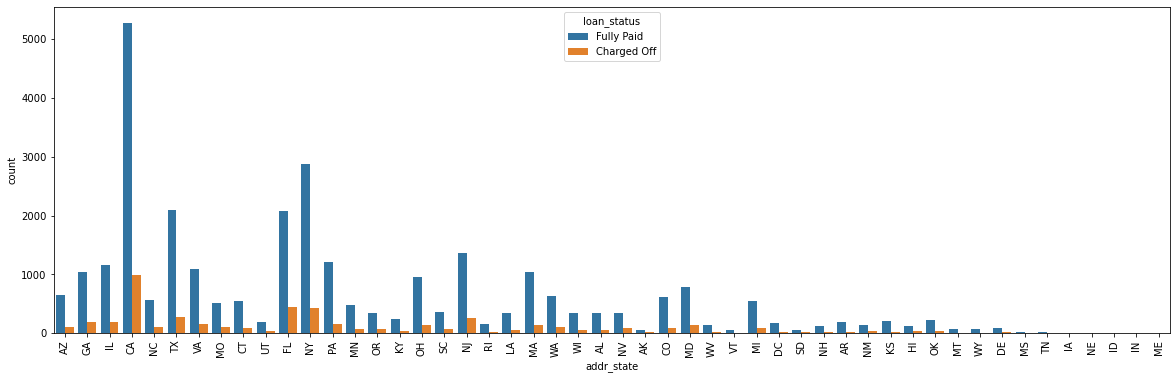

In [42]:
plt.figure(figsize=(20,6))
sns.countplot(hue=df_cleaned["loan_status"],x=df_cleaned["addr_state"])
plt.xticks(rotation=90)
plt.show()
#Higher cost of living - higher the risk of paying fully

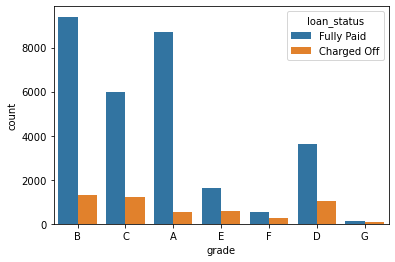

grade  loan_status
A      Charged Off     548
       Fully Paid     8706
B      Charged Off    1285
       Fully Paid     9402
C      Charged Off    1233
       Fully Paid     5977
D      Charged Off    1017
       Fully Paid     3617
E      Charged Off     586
       Fully Paid     1624
F      Charged Off     248
       Fully Paid      533
G      Charged Off      81
       Fully Paid      148
Name: loan_status, dtype: int64

In [43]:
sns.countplot(hue=df_cleaned["loan_status"],x=df_cleaned["grade"])
plt.show()

#Grades A,B & C more than 50% fully paid, whereas D,E & F has higher risk of not paying

df_cleaned.groupby(["grade","loan_status"])["loan_status"].count()

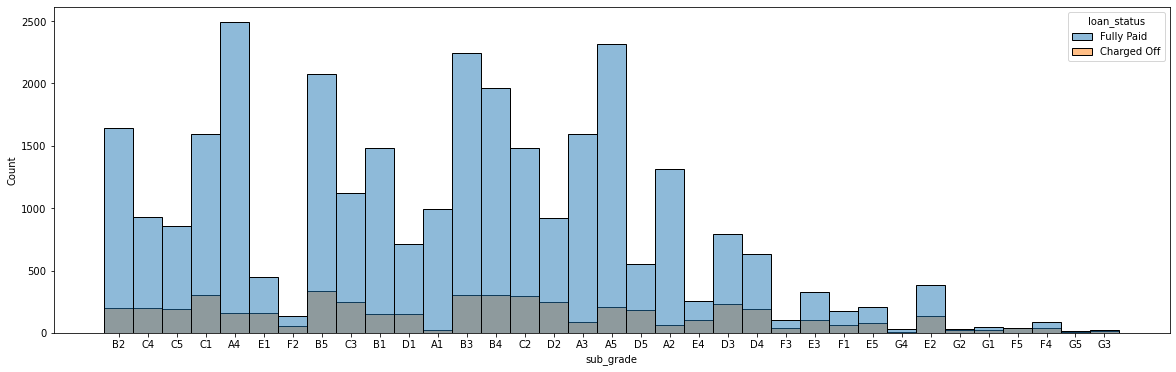

In [44]:
plt.figure(figsize=(20,6))
sns.histplot(hue=df_cleaned["loan_status"],x=df_cleaned["sub_grade"])
plt.show()

#Lender with Sub grade A4 paid the loan fully. A4 is recommended.
#B5 defaults in grade B
#E4,D3,D4,F3,E3,F2,D5,F1,E5,G4,E2,G2,G1,F5,F4,

<AxesSubplot:xlabel='verification_status', ylabel='count'>

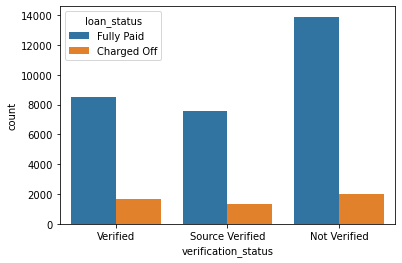

In [45]:
sns.countplot(hue=df_cleaned["loan_status"],x=df_cleaned["verification_status"])
#Verified & source verified charged off
#Even not verified customers tend to fuly pay the loan.

home_ownership  loan_status
MORTGAGE        Charged Off     1993
                Fully Paid     12860
NONE            Fully Paid         3
OTHER           Charged Off       17
                Fully Paid        76
OWN             Charged Off      379
                Fully Paid      2235
RENT            Charged Off     2609
                Fully Paid     14833
Name: loan_status, dtype: int64

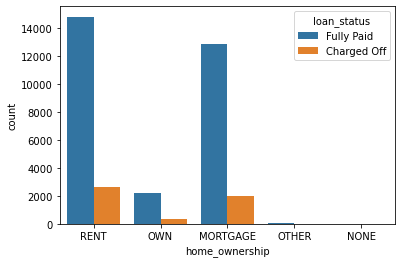

In [46]:
sns.countplot(hue=df_cleaned["loan_status"],x=df_cleaned["home_ownership"])
df_cleaned.groupby(["home_ownership","loan_status"],sort=True)["loan_status"].count()
#Mortgage & rent highly pay off the loan, Lenders who own house tend to default less

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

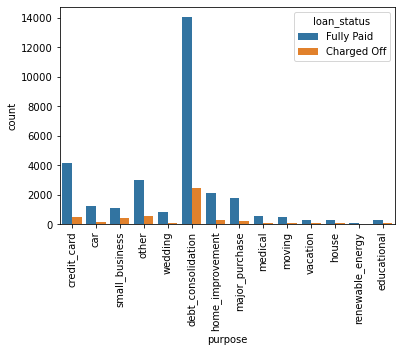

In [47]:
df_cleaned.groupby(["purpose","loan_status"],sort=True)["loan_status"].count()
sns.countplot(hue=df_cleaned["loan_status"],x=df_cleaned["purpose"])
plt.xticks(rotation = 90)

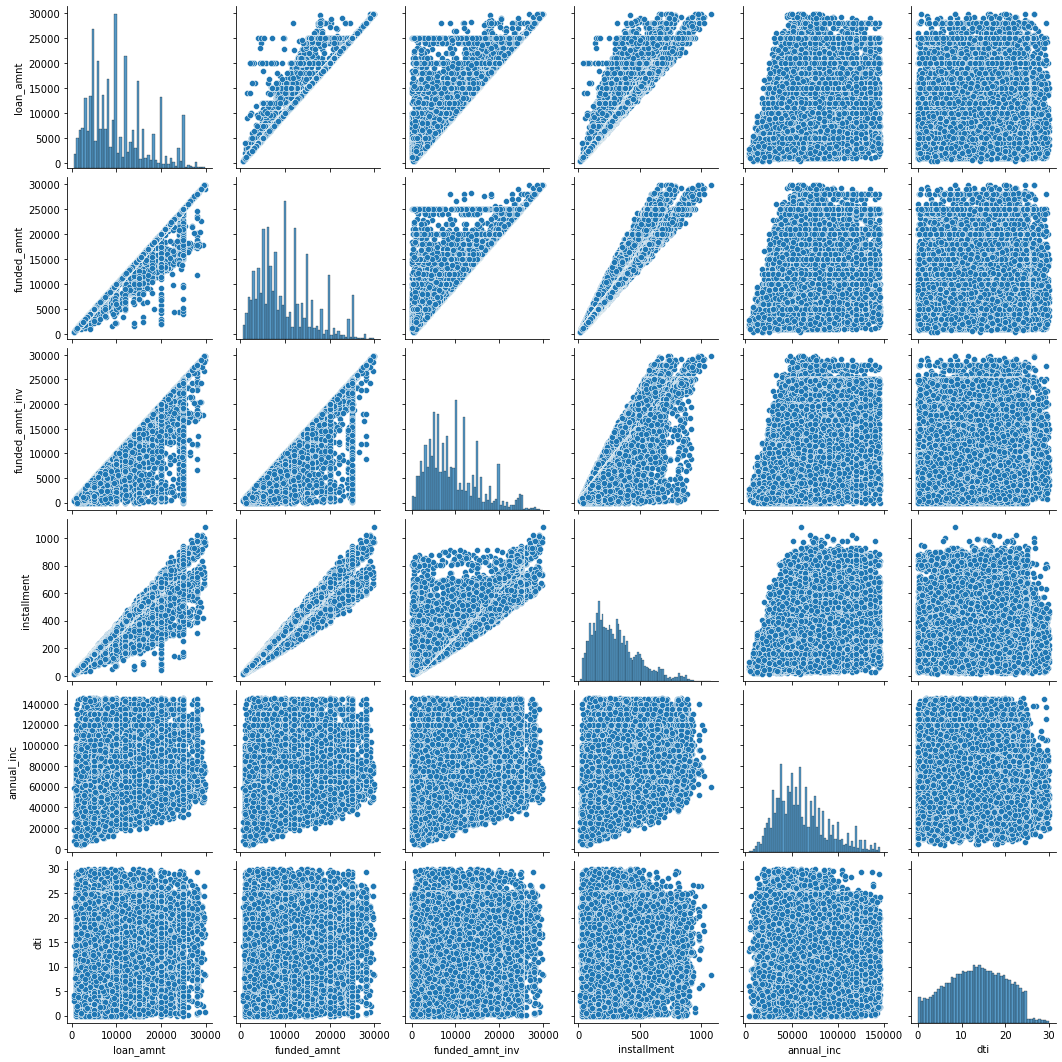

In [48]:
sns.pairplot(df_cleaned)

<AxesSubplot:>

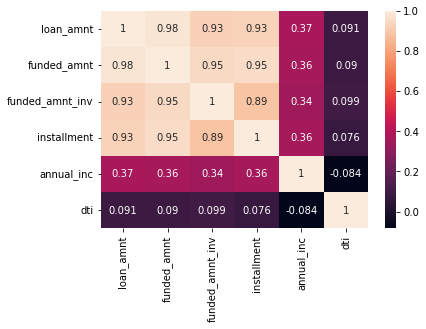

In [49]:
sns.heatmap(df_cleaned.corr(),annot=True)